# ggplot2 Geoms

|    Function      |  Common Aesthetic |  Common Argument      |
| :----------------|:------------------|:----------------------|
| geom_point()     |x, y               |                       |
| geom_line()      |x, y               | arrow, na.rm          |
| geom_segment()   |x, y, xend, yend   | arrow, na.rm          |
| geom_path()      |x, y               | na.rm                 |
| geom_polygon()   |x, y               |                       |
| geom_histogram   |x                  | bins, binwidth        |
| geom_abline()    |intercept, slope   |                       | 
| geom_hline()     |yintercept         |                       | 
| geom_vline()     |xintercept         | bins, binwidth        |  
| geom_smooth()    |x,y                | method, se, span      |
| geom_text()      |x, y, label        | parse, nudge_x, nudge_y|

In [1]:
library(readr)
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
titanic <- read_csv("Data/titanic_train.csv")
head(titanic)

Parsed with column specification:
cols(
  PassengerId = col_integer(),
  Survived = col_integer(),
  Pclass = col_integer(),
  Name = col_character(),
  Sex = col_character(),
  Age = col_double(),
  SibSp = col_integer(),
  Parch = col_integer(),
  Ticket = col_character(),
  Fare = col_double(),
  Cabin = col_character(),
  Embarked = col_character()
)


PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NA,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NA,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NA,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,NA,Q


# Histogram:
- Using the bins argument to change the number of bins used to create the histogram
- Default value of buns in Histogram is 30

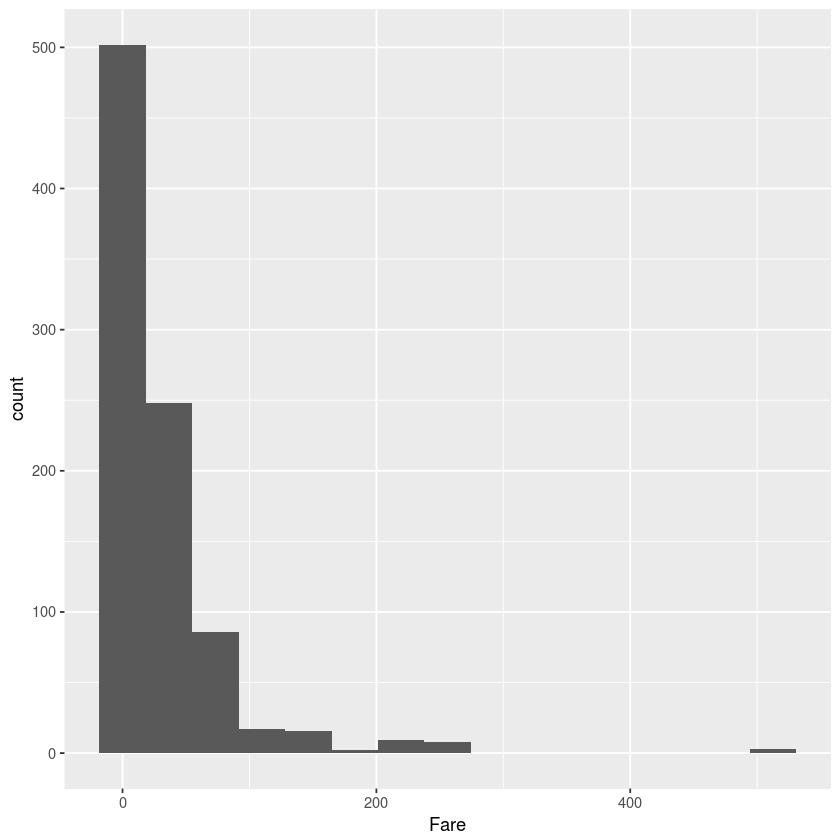

In [3]:
ggplot(titanic, aes(x = Fare)) + 
  geom_histogram(bins = 15 )

#### For help on geom functions use ?geom_histogram

<hr>

# Scatterplot 
- Need two aesthetics, x and y
- Plot the relationship between Time and Passes varibale from "worldcup" dataset 

In [4]:
worldcup <- read_csv("Data/worldcup.csv")

worldcup <- worldcup %>%
  select(player_name, everything()) %>%
  rename(Name = player_name)

head(worldcup)

Parsed with column specification:
cols(
  Team = col_character(),
  Position = col_character(),
  Time = col_integer(),
  Shots = col_integer(),
  Passes = col_integer(),
  Tackles = col_integer(),
  Saves = col_integer(),
  player_name = col_character()
)


Name,Team,Position,Time,Shots,Passes,Tackles,Saves
Abdoun,Algeria,Midfielder,16,0,6,0,0
Abe,Japan,Midfielder,351,0,101,14,0
Abidal,France,Defender,180,0,91,6,0
Abou Diaby,France,Midfielder,270,1,111,5,0
Aboubakar,Cameroon,Forward,46,2,16,0,0
Abreu,Uruguay,Forward,72,0,15,0,0


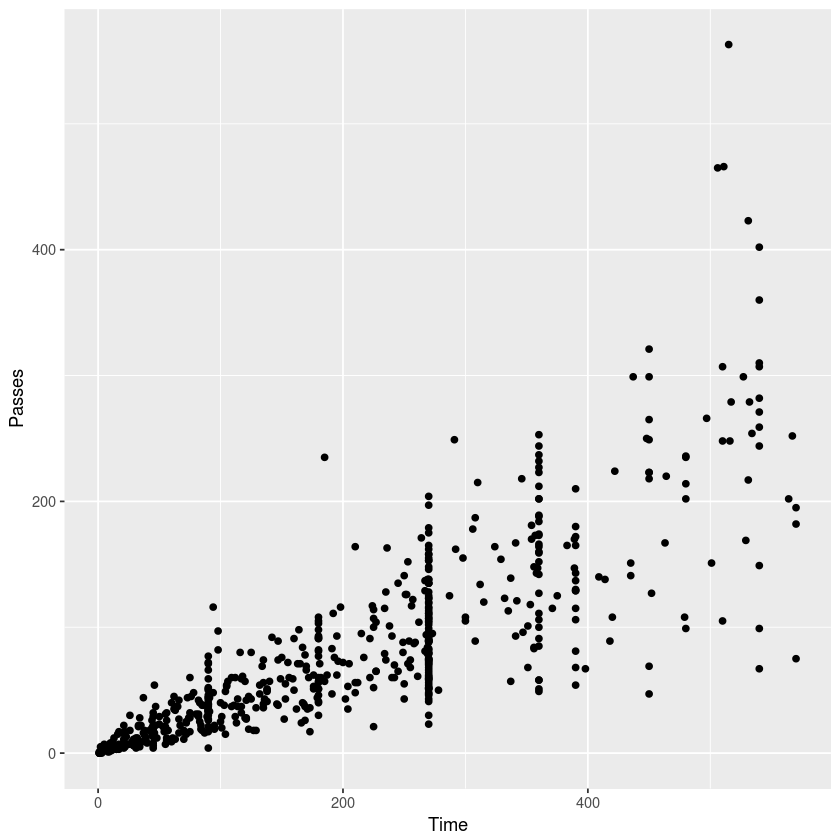

In [5]:
ggplot(worldcup, aes(x = Time, y = Passes)) + 
geom_point()

### Using Aesthetics optional arguments:
- All geom functions have both required and accepted aesthetics
- For example, the geom_point function requires x and y , but the function will also accept alpha (transparency), color , fill , group , size , shape , and stroke aesthetics

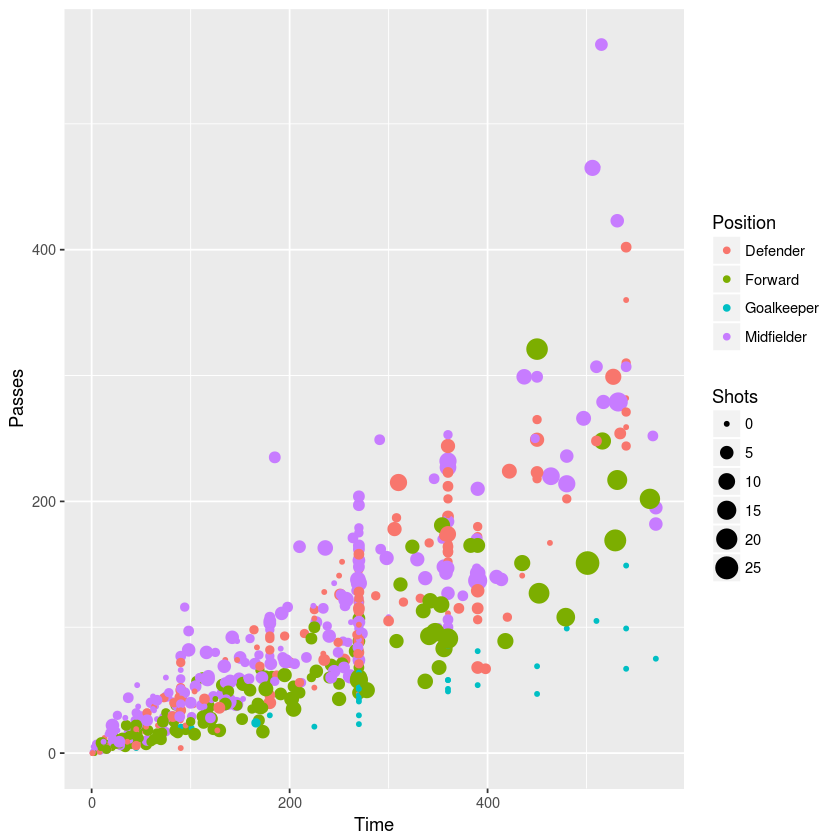

In [6]:
ggplot(worldcup, aes(x = Time, y = Passes, color = Position, size = Shots)) + 
geom_point()

## Using Constants Aesthetic in Geom
- Instead of mapping aesthetic to an element of data, use constant value
- Using different shapes

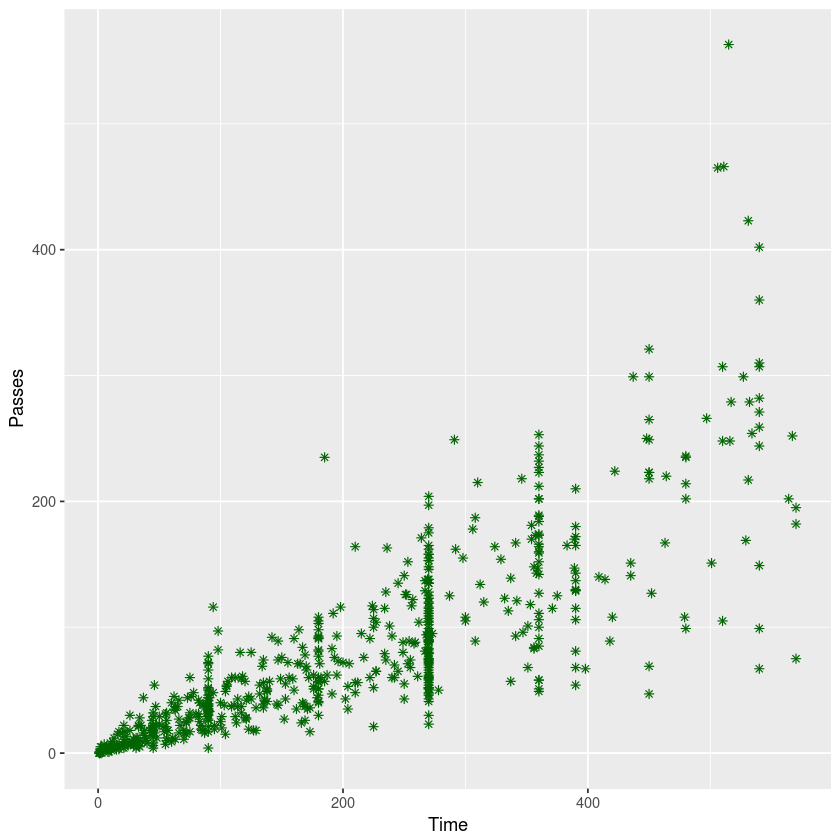

In [7]:
ggplot(worldcup, aes(x = Time, y = Passes)) +
  geom_point(color = "darkgreen", shape = 8)

<hr>

# Using Multiple Geoms

## Plot Histogram with Reference Verticle Lines
- Check if horizontal clustering is at 90-minute intervals
- Plot a histogram of player's time (Time) with reference lines every 90 minutes
- Player's time cluster at 90-minute marks
- at 270 minute mark, see the highest cluster, 270 minutes = 3 games (group stage)

Warning message:
“Ignoring unknown parameters: banwidth”`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


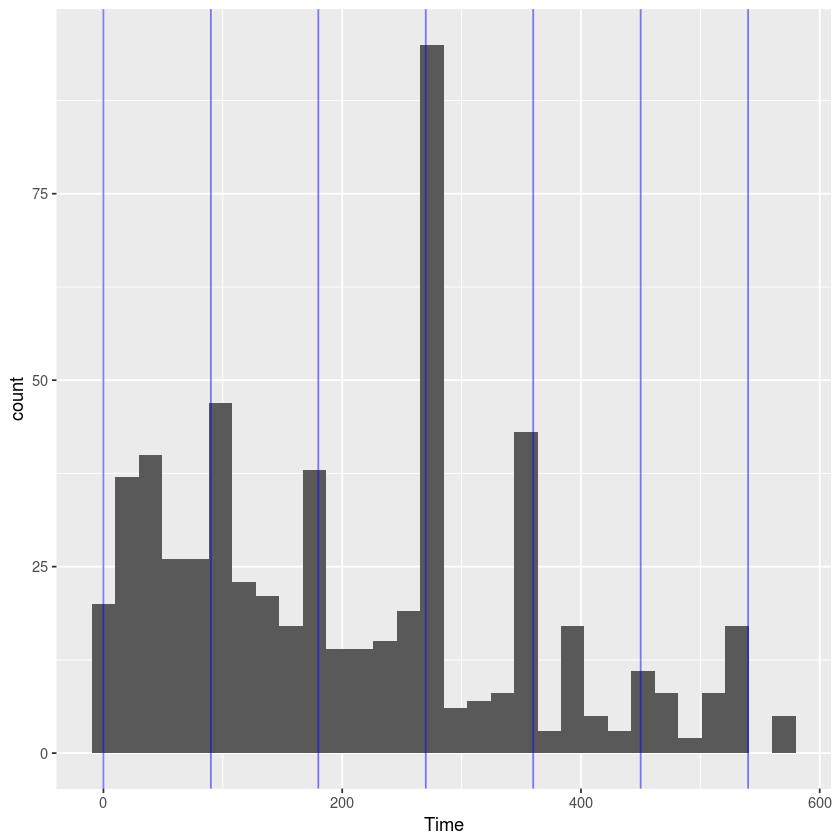

In [8]:
ggplot(data=worldcup, aes(x = Time)) +
  geom_histogram(banwidth = 10) +
  geom_vline(xintercept = 90*0:6, color = "blue", alpha = 0.5)

## Using Multiple Geoms
- Building up layers
- Add label points to the plots
- For the "worldcup" dataset, add label points for noteworthy players 

#### Create a new Variable column for the labels 

In [9]:
noteworthy_players <- worldcup %>%
  filter(Shots == max(Shots) | Passes == max(Passes)) %>%
  mutate(Point_Label = paste(Team, Position, Name, sep=", "))

noteworthy_players

Name,Team,Position,Time,Shots,Passes,Tackles,Saves,Point_Label
Gyan,Ghana,Forward,501,27,151,1,0,"Ghana, Forward, Gyan"
Xavi,Spain,Midfielder,515,4,563,6,0,"Spain, Midfielder, Xavi"


#### Plot using ggplot2

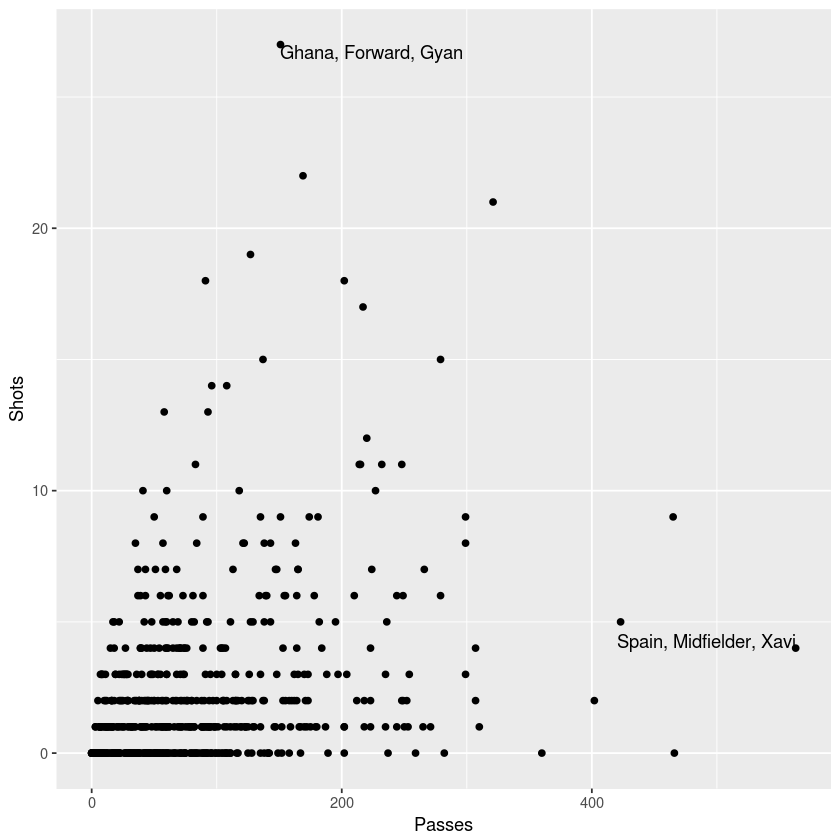

In [10]:
ggplot(data=worldcup, aes(x=Passes, y=Shots)) +
  geom_point() +
  geom_text(data=noteworthy_players, aes(label=Point_Label), vjust="inward", hjust="inward")